In [55]:
import numpy as np
from astropy.table import Table
from astropy.io import ascii
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy.constants import c, au

from collections import Counter

In [2]:
"""
colourblind-safe colours
"""
COLORS = (
    '#000000',
    '#0072b2',
    '#56b4e9',
    '#009e73',
    '#cc79a7',
    '#d55e00',
    '#e69f00',
    '#f0e442')


In [14]:
t = Table.read("dr2_grouped.vot", format="votable")
print len(t)
print t
print t.columns


4042
    Source_name_tgss         GLEAM        obsid    ...  flat GroupID GroupSize
                                                   ...                        
------------------------ -------------- ---------- ... ----- ------- ---------
TGSSADR J002922.6-111151 J002922-111151 1147217904 ... False       1         2
TGSSADR J000057.6-105431 J000057-105435 1147217904 ... False       2         2
TGSSADR J002209.0-104133 J002208-104133 1147217904 ... False       3         2
TGSSADR J005039.0-102735 J005039-102734 1147217904 ... False       4         8
TGSSADR J004954.1-100614 J004954-100613 1147217904 ...  True       5         9
TGSSADR J002050.3-085734 J002050-085731 1147217904 ... False       6         2
TGSSADR J003200.9-085137 J003201-085133 1147217904 ... False       7         3
TGSSADR J002317.9-080030 J002318-080026 1147217904 ... False      --        --
TGSSADR J002319.0-074449 J002319-074445 1147217904 ... False       8         2
TGSSADR J003354.6-073023 J003354-073019 1147217

In [13]:
#obsid containing 
cmeobs = '1147479952'
print sorted(set(t['obsid']))
cme_t = t[t['obsid'] == cmeobs]
print cme_t
print len(cme_t)

['1147217904', '1147218200', '1147223904', '1147224200', '1147307352', '1147313992', '1147314288', '1147393800', '1147400392', '1147400688', '1147479952', '1147480248', '1147486800', '1147487096']
    Source_name_tgss         GLEAM        obsid    ...  flat GroupID GroupSize
                                                   ...                        
------------------------ -------------- ---------- ... ----- ------- ---------
TGSSADR J010042.6-050236 J010042-050237 1147479952 ... False      21        12
TGSSADR J015602.9-050327 J015602-050325 1147479952 ... False     493        11
TGSSADR J004644.4-052201 J004644-052157 1147479952 ... False      20         7
TGSSADR J011727.8-042511 J011727-042505 1147479952 ...  True     221         5
TGSSADR J012227.9-042127 J012227-042123 1147479952 ...  True      23        13
TGSSADR J005408.3-033356 J005408-033354 1147479952 ... False      24        13
TGSSADR J015323.8-033400 J015323-033359 1147479952 ... False      29        14
TGSSADR J0143

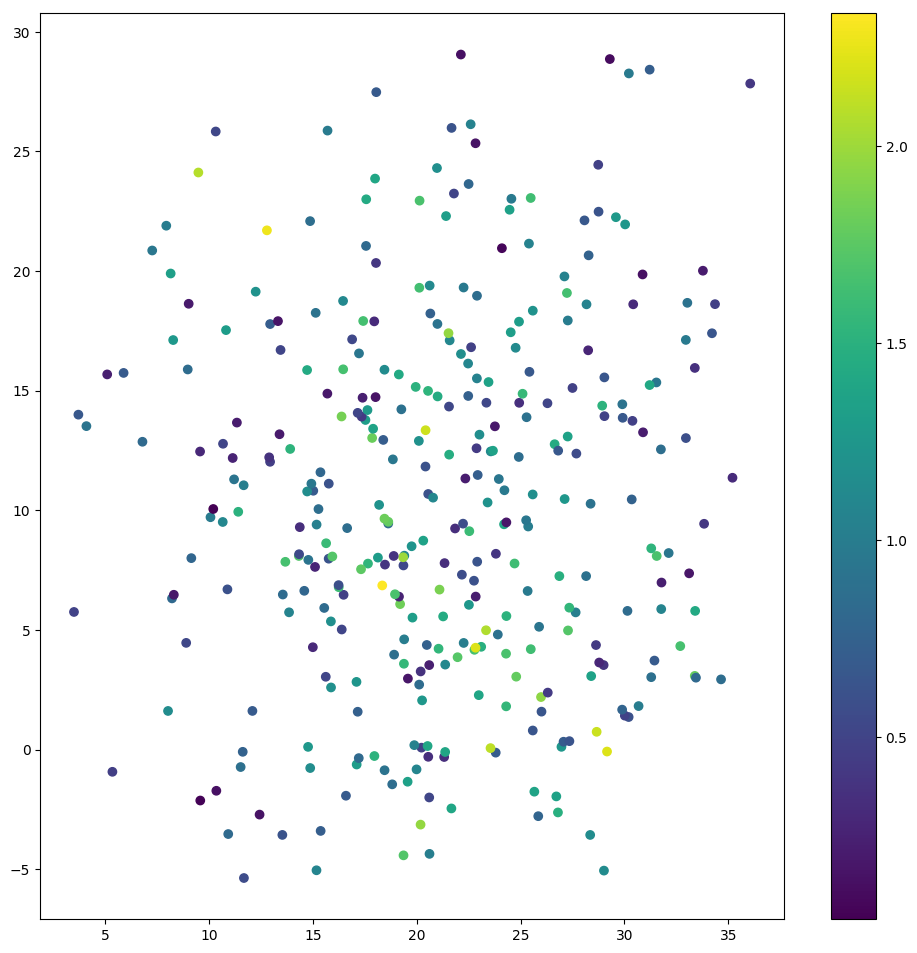

In [22]:
plt.figure(figsize=(12.0, 12.0))
plt.scatter(cme_t['RA_tgss'], cme_t['DEC_tgss'], marker='o', c=cme_t['nsi'])
plt.colorbar()


344


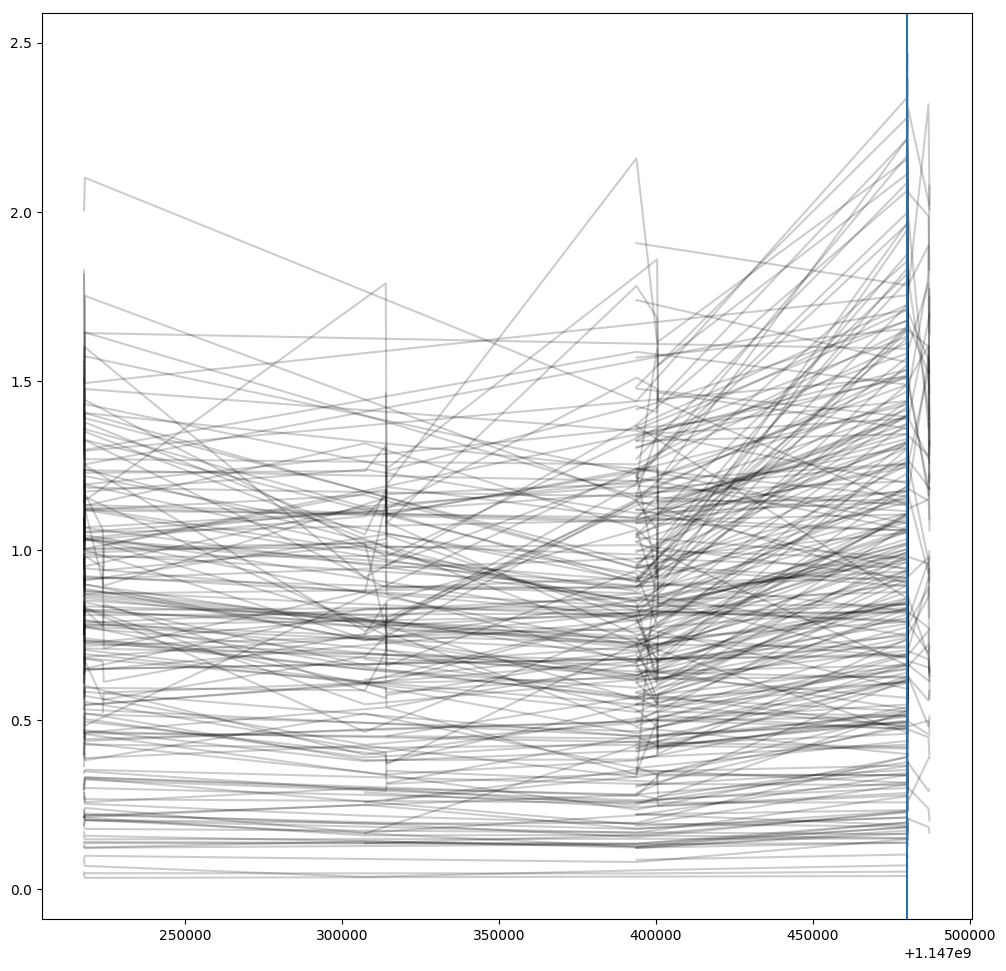

In [46]:
sources = sorted(cme_t['Source_name_tgss'])
obsids = np.int32(t['obsid'].data)
print len(sources)
#print sources
#print obsids
plt.figure(figsize=(12.0, 12.0))

for source in sources:
    scat = t[t['Source_name_tgss'] == source]
    y=scat['nsi'].data
    yerr=scat['err_nsi'].data
    x=[float(o) for o in scat['obsid'].data]
    plt.plot(x, y, color='black', alpha=0.2)
    #plt.errorbar(x, y, yerr, color='black', alpha=0.2)
plt.axvline(float(cmeobs))

#x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)
#plt.figure(figsize=(12.0, 12.0))
#plt.scatter(cme_t['RA_tgss'], cme_t['DEC_tgss'], marker='o', c=cme_t['nsi'])
#plt.colorbar()


The same, but highlight higher S/N sources

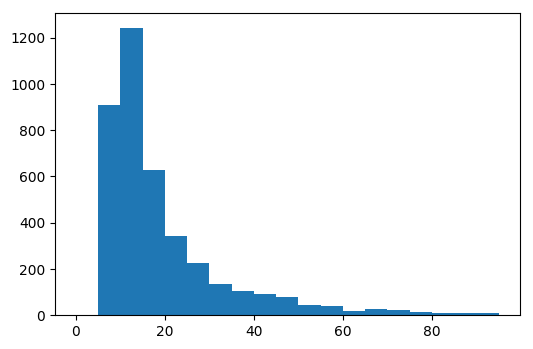

In [49]:
_, _, _ = plt.hist(t['nsi']/t['err_nsi'], bins=np.arange(0, 100, 5))

In [50]:
strong = t['nsi']/t['err_nsi'] > 15
weak = ~strong

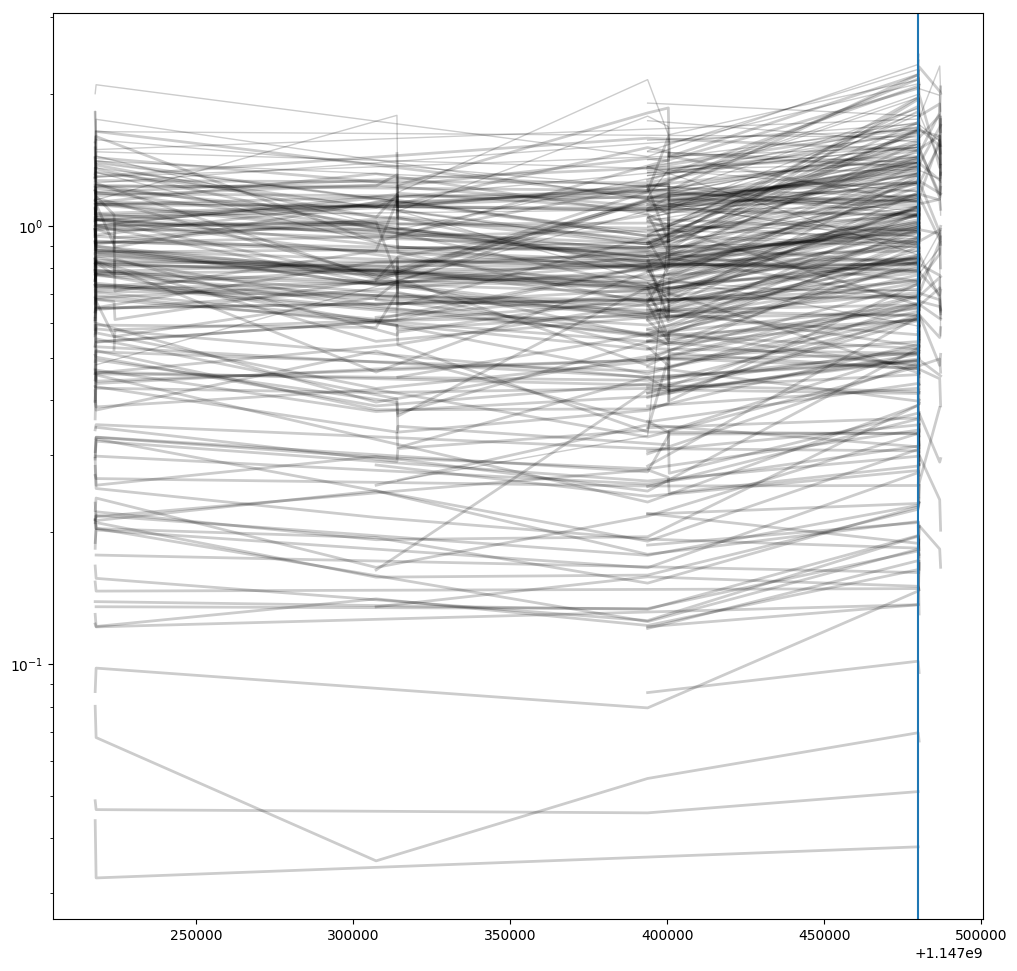

In [54]:
plt.figure(figsize=(12.0, 12.0))

for source in sources:
    scat = t[t['Source_name_tgss'] == source]
    y=scat['nsi'].data
    yerr=scat['err_nsi'].data
    x=[float(o) for o in scat['obsid'].data]
    if np.mean(scat['nsi']/scat['err_nsi']) > 10:
        plt.semilogy(x, y, color='black', alpha=0.2, linewidth=2)
    else:
        plt.semilogy(x, y, color='black', alpha=0.2, linewidth=1)

    #plt.errorbar(x, y, yerr, color='black', alpha=0.2)
plt.axvline(float(cmeobs))

#x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)
#plt.figure(figsize=(12.0, 12.0))
#plt.scatter(cme_t['RA_tgss'], cme_t['DEC_tgss'], marker='o', c=cme_t['nsi'])
#plt.colorbar()


Let's try including *all* sources that are detected more than once (/twice/thrice)

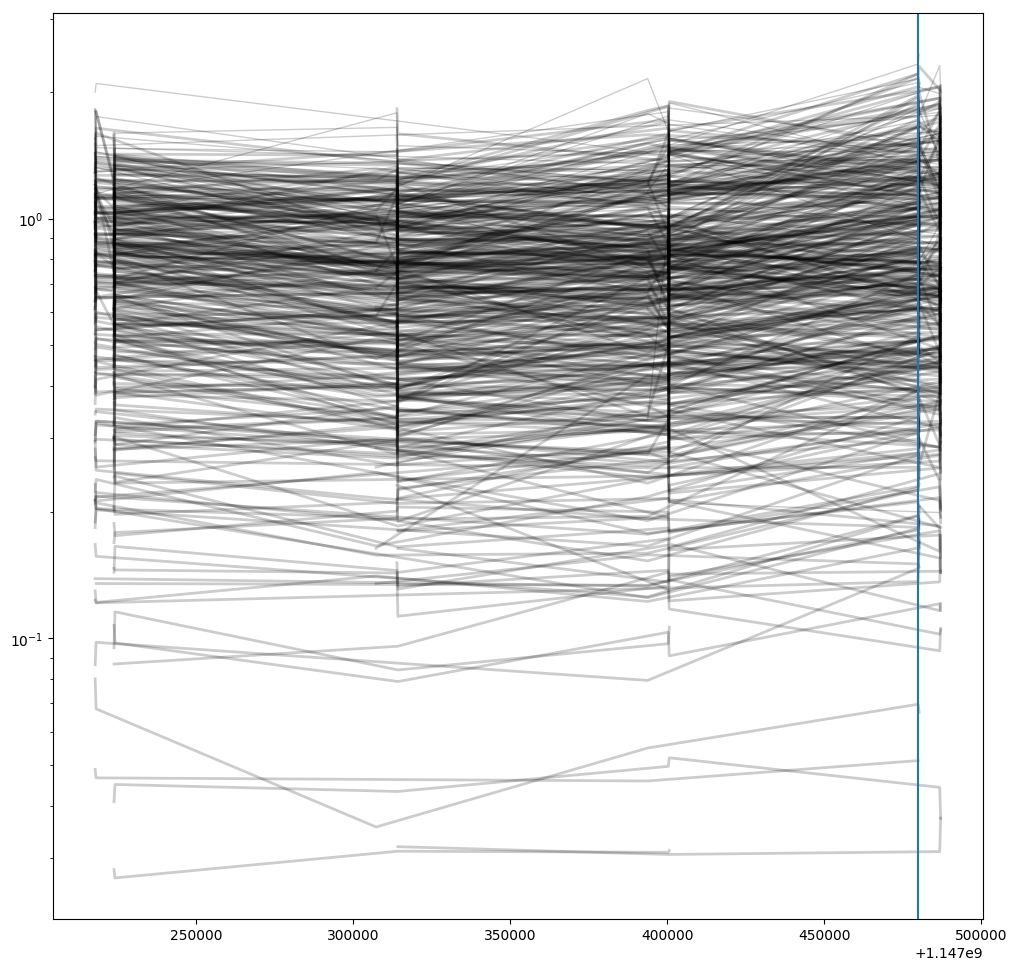

In [59]:
plt.figure(figsize=(12.0, 12.0))

sources = Counter(t['Source_name_tgss'])
#print sources
for source in sorted(sources):
    if sources[source] > 3:
        scat = t[t['Source_name_tgss'] == source]
        y=scat['nsi'].data
        yerr=scat['err_nsi'].data
        x=[float(o) for o in scat['obsid'].data]
        if np.mean(scat['nsi']/scat['err_nsi']) > 10:
            plt.semilogy(x, y, color='black', alpha=0.2, linewidth=2)
        else:
            plt.semilogy(x, y, color='black', alpha=0.2, linewidth=1)

    #plt.errorbar(x, y, yerr, color='black', alpha=0.2)
plt.axvline(float(cmeobs))

#x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)
#plt.figure(figsize=(12.0, 12.0))
#plt.scatter(cme_t['RA_tgss'], cme_t['DEC_tgss'], marker='o', c=cme_t['nsi'])
#plt.colorbar()
